In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

In [58]:
Wenu = pd.read_csv("http://opendata.cern.ch/record/545/files/Wenu.csv")
Zee = pd.read_csv("http://opendata.cern.ch/record/545/files/Zee.csv")

In [121]:
Wenu.head()

,Run,Event,pt,eta,phi,Q,type,delEta,delPhi,sigmaEtaEta,HoverE,isoTrack,isoEcal,isoHcal,MET,phiMET
0,167676,328843401,38.6387,-0.8499,1.8486,-1,EB,0,0,0.0095,0.0000,0.0000,1.2241,0.0000,46.7884,-1.3886
1,167676,328836311,59.1666,-2.1095,-2.5163,1,EE,0,0,0.0214,0.0177,20.4771,2.5441,6.7450,15.0179,1.1503
2,167676,328915343,31.7262,2.4504,2.8956,1,EE,0,0,0.0288,0.0000,0.7775,1.8222,0.3663,20.6550,-0.2703
3,167676,328884653,73.4109,-1.3951,2.0052,-1,EB,0,0,0.0100,0.0000,22.8584,8.0151,8.2951,3.2858,-0.7739
4,167676,328970109,49.1363,-2.4326,3.0219,1,EE,0,0,0.0271,0.0000,0.0000,0.1154,0.0000,3.1425,2.5081


In [113]:
def scatterHist(x, log = (False, False), xrange = None, yrange = None, xlabel = None, ylabel = None, title = None, **kwargs):
    n, bins = np.histogram(x, 300, range = xrange)
    bins = np.array([(bins[i-1] + bins[i])/2 for i in range(1,len(bins))])
    plt.scatter(bins, n, s =20, marker = '+', **kwargs)
    
    if isinstance(log, tuple):
        if log[0]:
            plt.xscale('log')
        if log[1]:
            plt.yscale('log')
    else:
        if log:
            plt.yscale('log')
    if yrange:
        plt.ylim(*yrange)
    if xrange:
        plt.xlim(*xrange)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if title:
        plt.title(title)


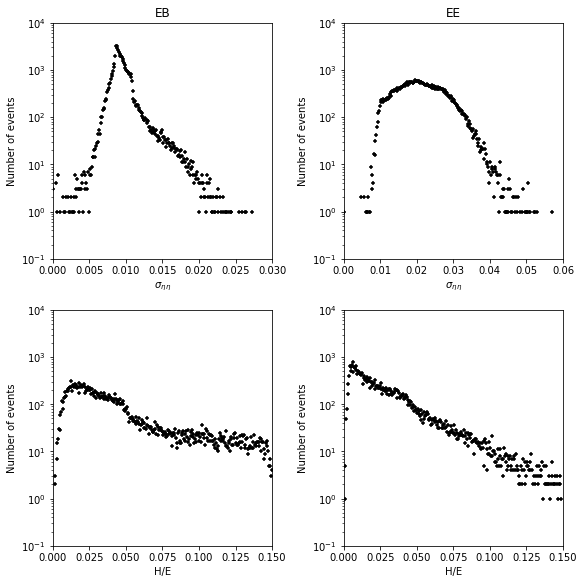

In [119]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8), constrained_layout = True)

plt.sca(ax[0, 0])
scatterHist(Wenu.loc[Wenu['type'] == 'EB']['sigmaEtaEta'],
                                log = True, yrange=(1e-1, 1e4), xrange = (0, 0.03), c = 'black',
                                xlabel = '$\sigma$$_\eta$$_\eta$', ylabel = 'Number of events', title = 'EB')

plt.sca(ax[0, 1])
scatterHist(Wenu.loc[Wenu['type'] == 'EE']['sigmaEtaEta'],
                                log = True, yrange=(1e-1, 1e4), xrange = (0, 0.06), c = 'black',
                                xlabel = '$\sigma$$_\eta$$_\eta$', ylabel = 'Number of events', title = 'EE')

plt.sca(ax[1, 0])
scatterHist(Wenu.loc[Wenu['type'] == 'EB']['HoverE'],
                                log = True, yrange=(1e-1, 1e4), xrange = (0, 0.15), c = 'black',
                                xlabel = 'H/E', ylabel = 'Number of events')


plt.sca(ax[1, 1])
scatterHist(Wenu.loc[Wenu['type'] == 'EE']['HoverE'],
                                log = True, yrange=(1e-1, 1e4), xrange = (0, 0.15), c = 'black',
                                xlabel = 'H/E', ylabel = 'Number of events')
plt.show()

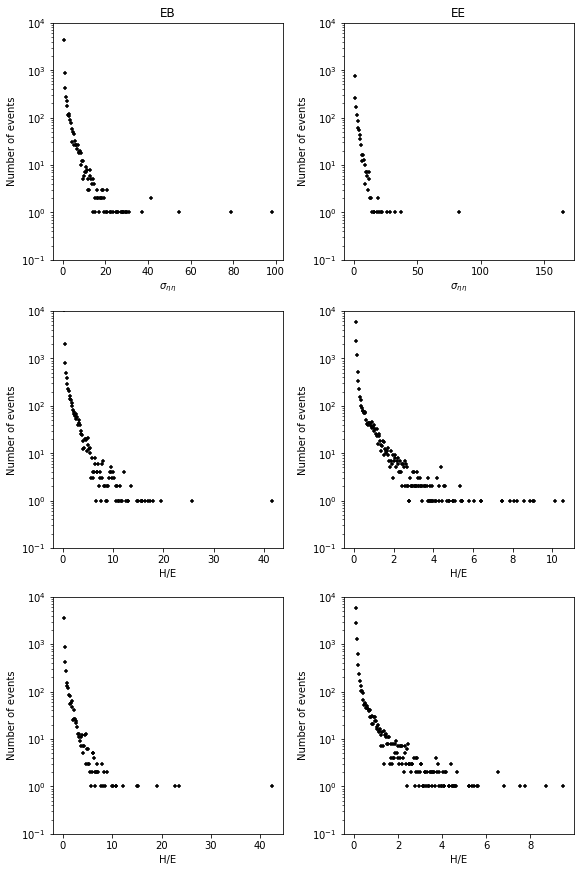

In [125]:
fig, ax = plt.subplots(3, 2, figsize=(8, 12), constrained_layout = True)

plt.sca(ax[0, 0])
scatterHist(Wenu.loc[Wenu['type'] == 'EB']['isoTrack']/Wenu.loc[Wenu['type'] == 'EB']['pt'],
                                log = True, yrange=(1e-1, 1e4), c = 'black',
                                xlabel = '$\sigma$$_\eta$$_\eta$', ylabel = 'Number of events', title = 'EB')

plt.sca(ax[0, 1])
scatterHist(Wenu.loc[Wenu['type'] == 'EE']['isoTrack']/Wenu.loc[Wenu['type'] == 'EE']['pt'],
                                log = True, yrange=(1e-1, 1e4), c = 'black',
                                xlabel = '$\sigma$$_\eta$$_\eta$', ylabel = 'Number of events', title = 'EE')

plt.sca(ax[1, 0])
scatterHist(Wenu.loc[Wenu['type'] == 'EB']['isoEcal']/Wenu.loc[Wenu['type'] == 'EB']['pt'],
                                log = True, yrange=(1e-1, 1e4), c = 'black',
                                xlabel = 'H/E', ylabel = 'Number of events')


plt.sca(ax[1, 1])
scatterHist(Wenu.loc[Wenu['type'] == 'EE']['isoEcal']/Wenu.loc[Wenu['type'] == 'EE']['pt'],
                                log = True, yrange=(1e-1, 1e4), c = 'black',
                                xlabel = 'H/E', ylabel = 'Number of events')

plt.sca(ax[2, 0])
scatterHist(Wenu.loc[Wenu['type'] == 'EB']['isoHcal']/Wenu.loc[Wenu['type'] == 'EB']['pt'],
                                log = True, yrange=(1e-1, 1e4), c = 'black',
                                xlabel = 'H/E', ylabel = 'Number of events')


plt.sca(ax[2, 1])
scatterHist(Wenu.loc[Wenu['type'] == 'EE']['isoHcal']/Wenu.loc[Wenu['type'] == 'EE']['pt'],
                                log = True, yrange=(1e-1, 1e4), c = 'black',
                                xlabel = 'H/E', ylabel = 'Number of events')

plt.show()